# Make FEEM plots

edit the file data.m.  That will include -99 as the top left corner (or any number arbitrary number, it is just there to avoid a "matrix size" error).  The top row are the ex wavelengths. the left row is the em wavelengths.  The "middle" is the fluorescence values.  Change data.m for whatever data you are looking at.  

data.m will not be saved permanently.  each time it will reset to the value stored in the cloud. same with the graphs that are generated. you need to collect the graphs you need after generating them.  

In [133]:
% set to use the plotly figure format.  best for exporting. and you can actually rotate on screen even.
%graphics_toolkit ("plotly"); clear;
graphics_toolkit ("notebook"); clear;
%graphics_toolkit ("gnuplot"); clear;
%graphics_toolkit ("fltk"); clear;
available_graphics_toolkits ()
% get the data
run("data.m")



ans = {
  [1,1] = fltk
  [1,2] = gnuplot
  [1,3] = notebook
  [1,4] = plotly
}


# define functions to manipulate the data 

you can compress these boxes by clicking to the left so they won't "clutter" up the screen

In [134]:
function [F,em,ex]=Fprocess(data,fraction)

[N,M]=size(data); c=0;

for i=2:1:M
    c=c+1; F(:,c)=data(2:N,i)-min(data(2:N,i));
end

F=F'; ex=data(1,2:M); em=data(2:N,1); [N,M]=size(F);

for i=1:N
    for j=1:M
        EM=em(j);
        EX=ex(i);
        if EM>=EX*(1-fraction)
            if EM<=EX*(1+fraction)
                F(i,j)=NaN;
            end
        end
    end
end
  
for i=1:N
    for j=1:M
        EM=em(j);
        EX=ex(i);
        if EM>=(2*EX)*(1-fraction)
            if EM<=(2*EX)*(1+fraction)
                F(i,j)=NaN;
            end
        end
    end
end
     
end

In [135]:

function [G,H]=resample(data,em)

% try to resample so things look better

[N,M]=size(data); % M is em points N is ex points.  resample every 10 nm for M

for i=1:N
    Fem=data(i,:); c=0;
    for j=1:10:M
       c=c+1; Femred(c)=Fem(j); emred(c)=em(j);
    end
    %figure(3); plot(em,Fem,'k',emred,Femred,'ko')
    %k=waitforbuttonpress
    datare(i,:)=Femred;
end
G=datare;
H=emred;
end

In [136]:
function makesurfaceplot(F,em,ex)
 colormap('jet')
 h=surf(em,ex,F)
 set(gca,'linewidth',2)
 view([-26 48])
 axis([min(em) max(em) min(ex) max(ex) 0 max(max(F))*1.1])
 h=xlabel('Emission (nm)'); set(h,'fontsize',12)
h=ylabel('Excitation (nm)');  set(h,'fontsize',12)
h=zlabel('Intensity (arb.)'); set(h,'fontsize',12)
end

In [137]:
function makecontourplot(F,em,ex)
 colormap('jet')
 h=surf(em,ex,F)
 shading interp
 hold on; [C,h]=contour3(em,ex,F,3,'k'); set(h,'linewidth',2); 
   set(gca,'linewidth',2)
     axis([min(em) max(em) min(ex) max(ex) 0 max(max(F))])
view([0 90])
hold on; plot3([250 600],[450 450],[0 0],'k','linewidth',2)
hold on; plot3([600 600],[220 450],[0 0],'k','linewidth',2)
h=xlabel('Emission (nm)'); set(h,'fontsize',12)
h=ylabel('Excitation (nm)');  set(h,'fontsize',12)
end

# Now make the plots

here are the things you can change

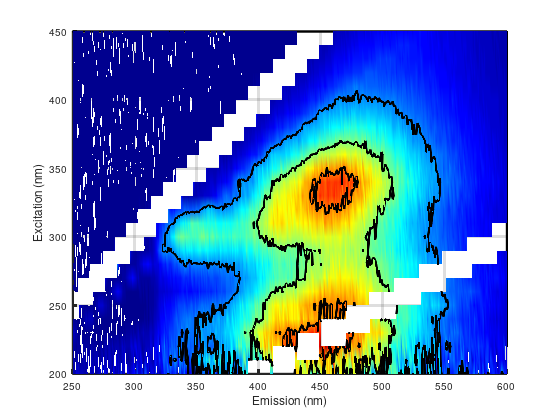

h = -3524.9


In [138]:
scatterfactor=0.02;
[F,em,ex]=Fprocess(data,scatterfactor);
[Fr,emr]=resample(F,em); 

graphics_toolkit ("notebook"); 
makecontourplot(F,em,ex)
%h=title('Fluorescence');  set(h,'fontsize',12)
print contour.png -dpng
%txt=['print ',name,'contour.png -dpng']; eval(txt)

%figure(2); clf
%makesurfaceplot(Fr,emr,ex)
%h=title('Fluorescence');  set(h,'fontsize',12)
%txt=['print ',name,'surf.png -dpng']; eval(txt)

%txt=['save ',name]; eval(txt);

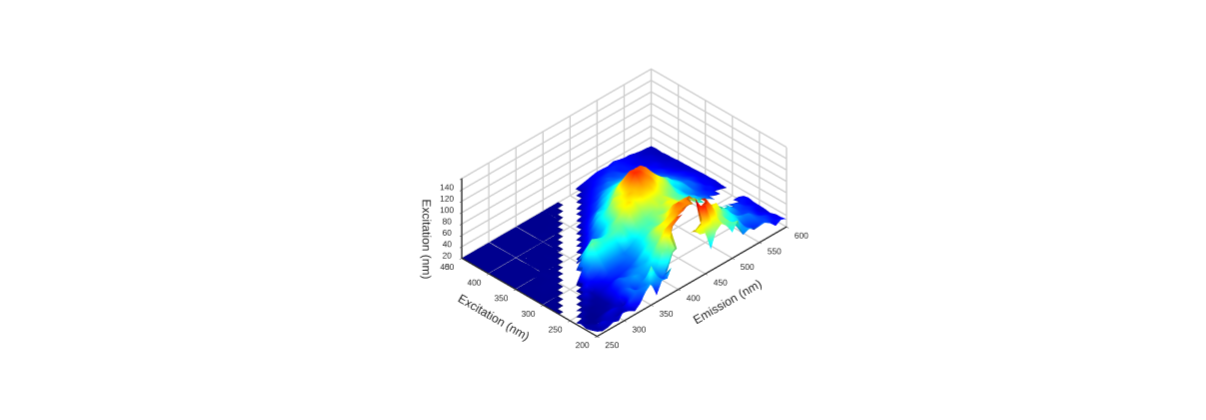

h = -3703.9


In [139]:
[Fr,emr]=resample(F,em); 


%figure(2); clf
graphics_toolkit ("plotly"); 
makesurfaceplot(Fr,emr,ex)
%h=title('Fluorescence');  set(h,'fontsize',12)
%txt=['print ',name,'surf.png -dpng']; eval(txt)

%txt=['save ',name]; eval(txt);